### Assignment Part-I
SARVA M SUMANTH

In [ ]:
GitHub URL: 

#### Problem Statement:
Surprise Housing, A US-based housing company, uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company has collected a data set from the sale of houses in Australia.

From the Dataset Provided we need to find: 
 - Which variables are significant in predicting the price of a house
 - How well those variables describe the price of a house.

#### Business goal:

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 
Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Steps:
 1. Reading and understanding the data
 2. Data Cleaning
 3. EDA
 4. Data Preparation for modelling
 5. Train-Test Split
 6. Building the Model
    - Lasso
    - Ridge+RFE
 7. Observation
 8. Conclusion

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

### Step 1: Reading and understanding the data

In [3]:
#reading the data into dataframe 
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Lets see the size of the dataframe
data.shape

(1460, 81)

In [5]:
#lets understand the dataframe with info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are multiple numerical and catergorical features in our dataframe

In [6]:
#lets print the dataframe column names
print(data.columns)

print('\n')

#Lets understand the spread of the data
data.describe()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#lets see for the missing values null values

# Function to return columns with null values and its percentage

def missing_value_columns():
    Count = data.isnull().sum().sort_values(ascending=False)
    percent = round(data.isnull().sum()*100/len(data), 2).sort_values(ascending=False)
    
    df = pd.concat([Count, percent], axis=1, keys=['Count', 'Percent'])
    df = df[df.Count != 0]
    return df
   
# Printing columns with null values
missing_value_columns()

,Count,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


### Step 2: Cleaning the data

In [8]:
#The columns with missing values
data.columns[data.isnull().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

Out of the above columns, few columns has meaningful null values which may contribute significantly for our analysis. So we should keep them unchanged.

In [9]:
columns_with_meaningfull_null = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageCond", "GarageType", 
          "GarageFinish", "GarageQual", "BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtFinType1",
          "BsmtCond", "MasVnrType"]

In [10]:
# lets change the NA into None for better interpretation

for column in columns_with_meaningfull_null:
    data[column].fillna("None", inplace=True)
    
    
#lets see the remaining columns with null values    
missing_value_columns()

,Count,Percent
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrArea,8,0.55
Electrical,1,0.07


#### lets replace null values of Garage year built and masvnrarea with zero which makes more sense
#### LotFrontage means linear square feet connected to road, which should also be zero if it is na, which makes much sense
#### Lets drop that one row where electrical is na, which is more feasible and logical

In [11]:
columns_to_fillna_as_zero = ["GarageYrBlt", "MasVnrArea","LotFrontage"]

for column in columns_to_fillna_as_zero:
    data[column].fillna(0, inplace=True)

#dropping row where electrical is na
data=data.dropna(axis=0, subset=['Electrical'])

In [12]:
#we wont get any output for the following code as we fixed all the missing values
missing_value_columns()

,Count,Percent


In [13]:
# Dropping the 'Id' column as it is just an Identifier
data.drop(columns=["Id"], inplace=True)

In [14]:
#convert GarageYrBlt into int datatype
data['GarageYrBlt'] = data['GarageYrBlt'].astype(int)

# Lets create new column 'Remodelled' and fill it with house remodelling details based on the 
# columns 'remodelled' and 'built years'
def checkRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
#apply the above function
data['IsRemodelled'] = data.apply(checkRemodel, axis=1)
data.head()   

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,2,2008,WD,Normal,208500,0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,None,None,None,0,5,2007,WD,Normal,181500,0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,None,0,9,2008,WD,Normal,223500,1
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,None,None,None,0,2,2006,WD,Abnorml,140000,1
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,None,None,None,0,12,2008,WD,Normal,250000,0


In [15]:
# Lets Create a new column name BuiltOrRemodelAge determine the age of the building

def BuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
data['BuiltOrRemodelAge'] =data.apply(BuiltOrRemodelAge, axis=1)
data.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,0,2,2008,WD,Normal,208500,0,5
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,None,None,0,5,2007,WD,Normal,181500,0,31
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,0,9,2008,WD,Normal,223500,1,6
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,None,None,0,2,2006,WD,Abnorml,140000,1,36
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,None,None,0,12,2008,WD,Normal,250000,0,8


In [16]:
# Since we have created new features from YearBuilt, YearRemodAdd and YrSold we can drop these columns

data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold'], axis = 1, inplace = True)

In [17]:
#dropping columns with singular values or values greater than 90%


In [18]:
# Check if there are any duplicate values in the dataset

data[data.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge


#### Outlier Treatment

In [19]:
# Check outliers for 25%,50%,75%,90%,95% and above

data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,IsRemodelled,BuiltOrRemodelAge
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.881426,57.612748,10517.363948,6.100069,5.575737,103.187800,443.943797,46.581220,567.366004,1057.891021,...,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,180930.394791,0.476354,22.965045
std,42.310746,34.673850,9984.666267,1.383171,1.113079,180.773158,456.106417,161.369977,441.992392,438.500975,...,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,79468.964025,0.499612,20.639721
min,20.000000,0.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,-1.000000
25%,20.000000,42.000000,7549.000000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,796.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129950.000000,0.000000,4.000000
50%,50.000000,63.000000,9477.000000,6.000000,5.000000,0.000000,384.000000,0.000000,479.000000,992.000000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,0.000000,14.000000
75%,70.000000,79.000000,11603.000000,7.000000,6.000000,164.500000,712.500000,0.000000,808.000000,1298.500000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,1.000000,41.000000
90%,120.000000,92.000000,14388.400000,8.000000,7.000000,335.000000,1066.000000,117.400000,1232.000000,1602.400000,...,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,278000.000000,1.000000,56.000000
95%,160.000000,104.000000,17402.300000,8.000000,8.000000,456.000000,1274.000000,396.400000,1468.000000,1753.000000,...,175.100000,180.300000,0.000000,160.000000,0.000000,0.000000,11.000000,326200.000000,1.000000,58.000000
99%,190.000000,137.420000,37593.680000,10.000000,9.000000,791.360000,1572.420000,830.560000,1797.100000,2155.100000,...,285.840000,261.100000,168.000000,268.100000,0.000000,700.000000,12.000000,442629.620000,1.000000,60.000000


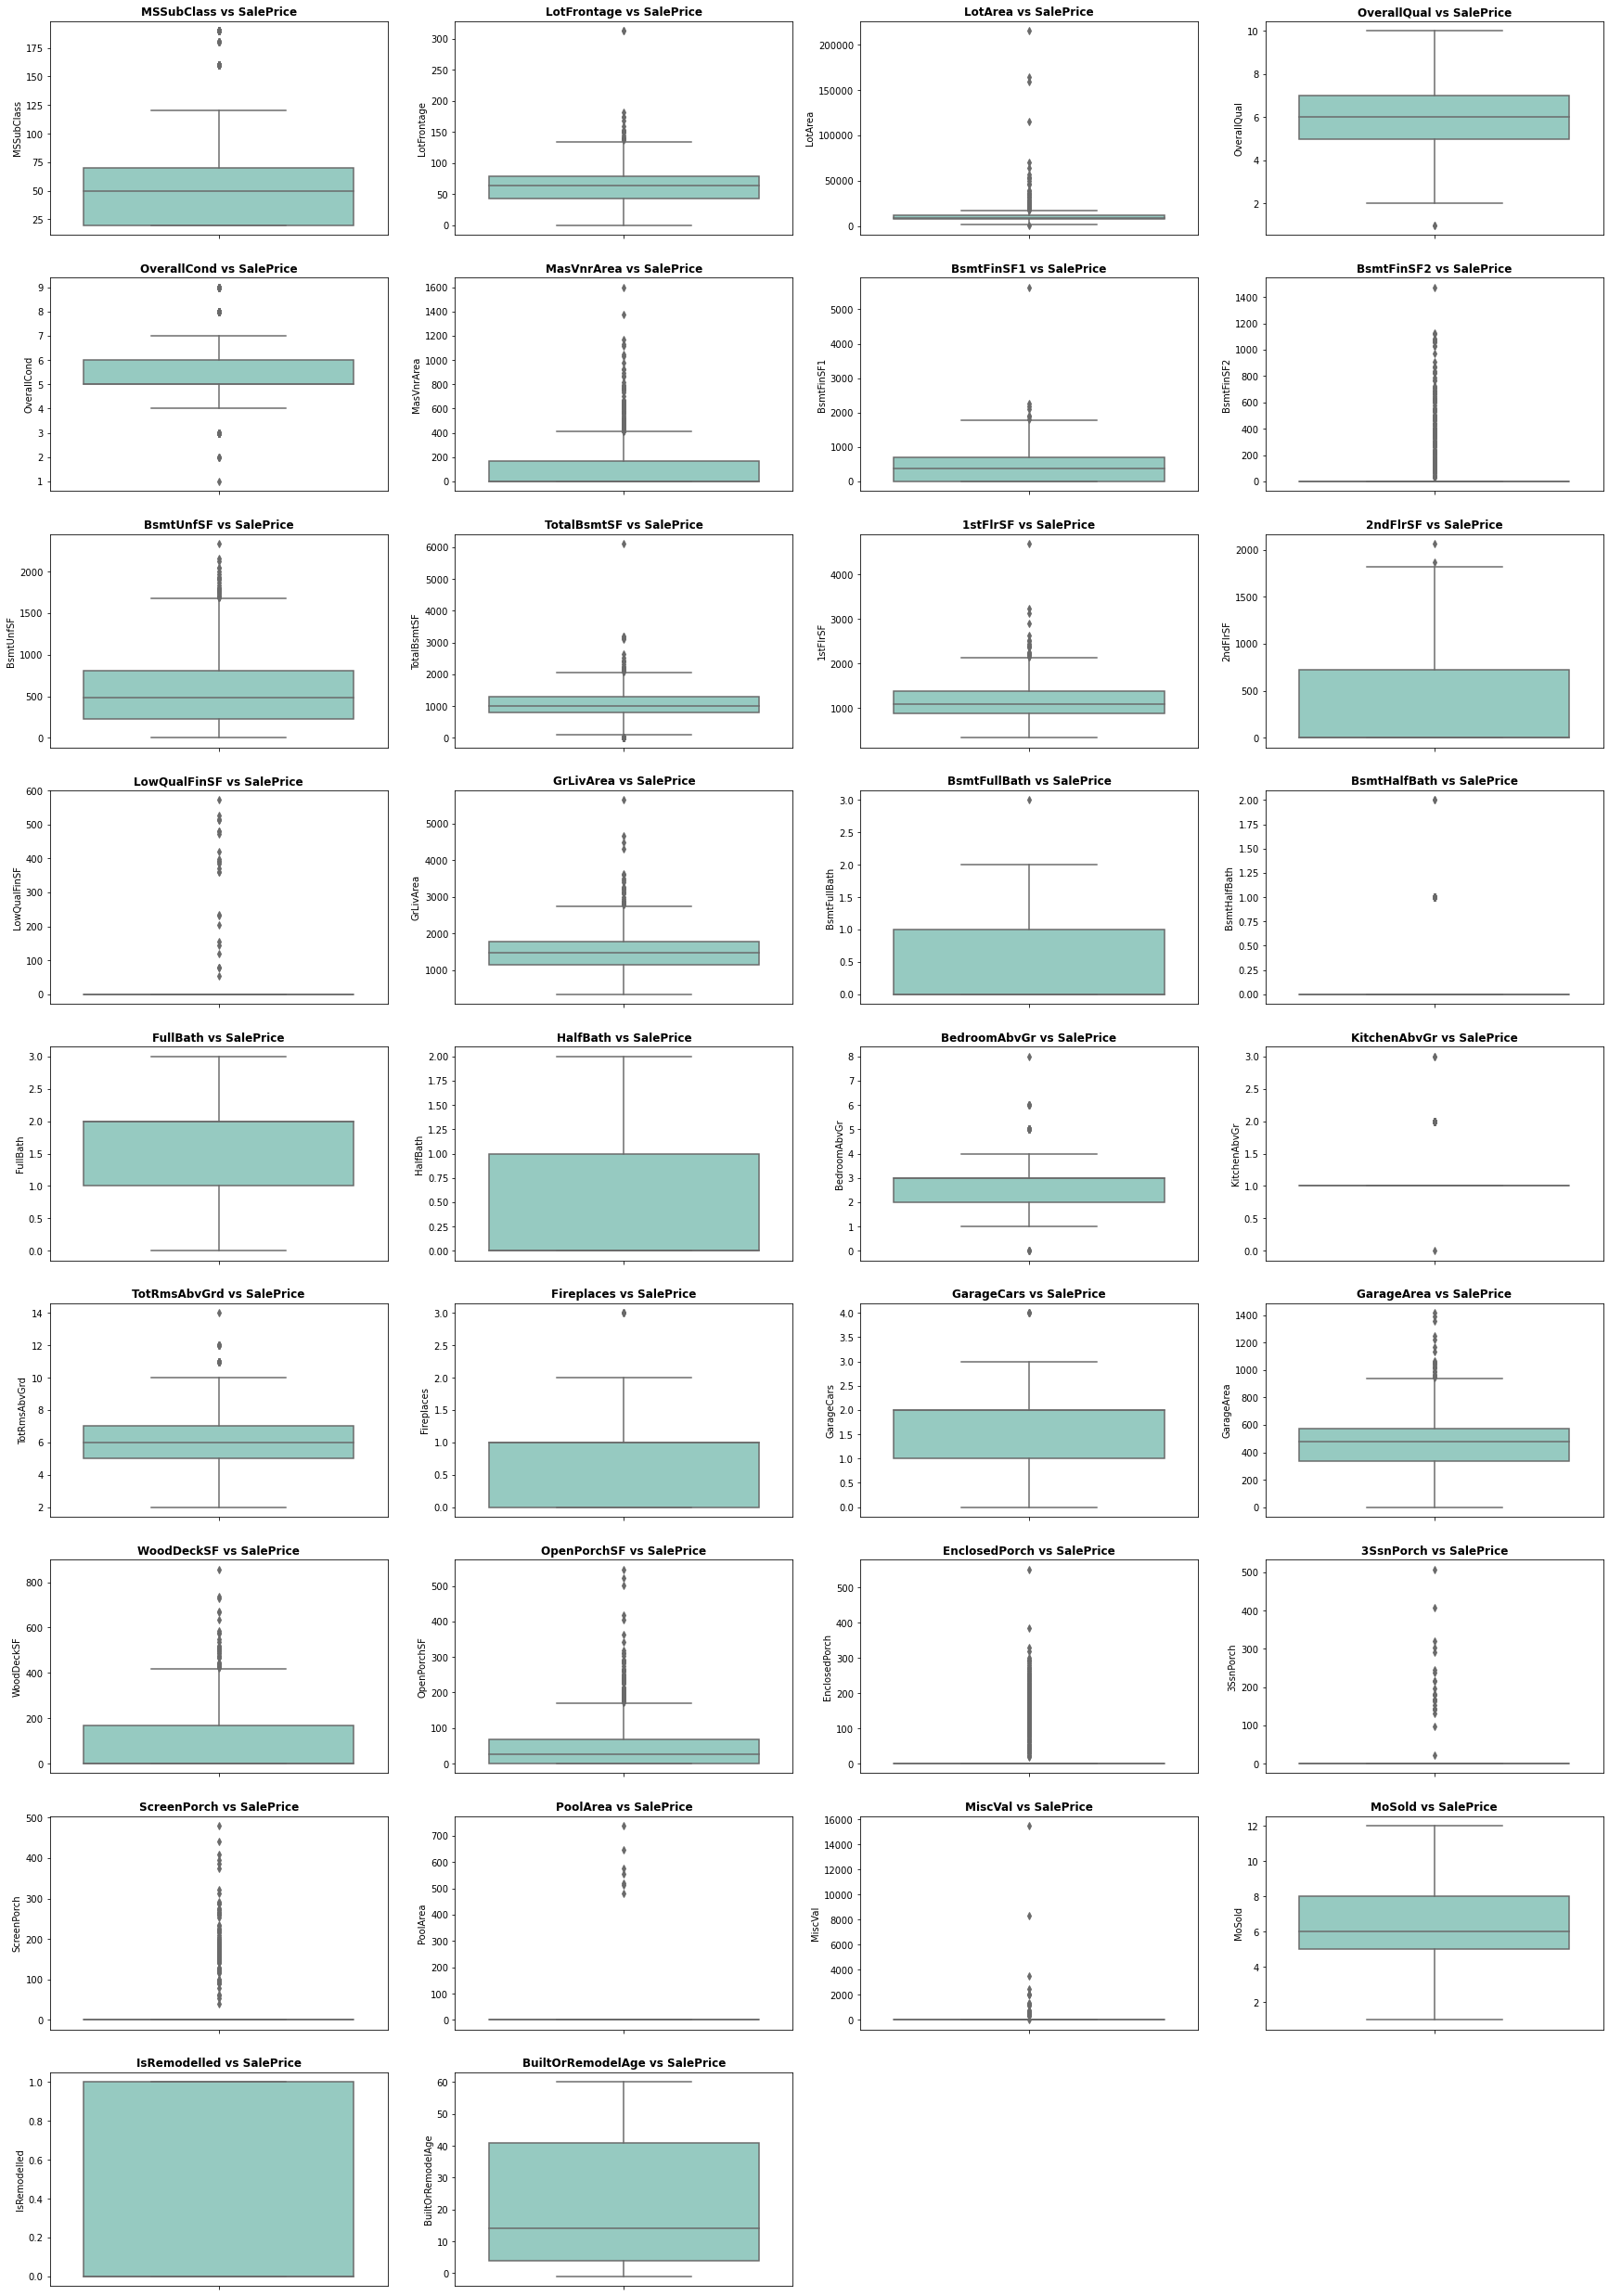

In [20]:
#lets see the boxplots of the numerical columns
numerical_df = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(30, 50))

count = 1

for column in numerical_df.columns:
    if column != 'SalePrice':
        plt.subplot(10, 4, count)
        sns.boxplot(y = column, palette='Set3', data = data)
        plt.title(column + " vs " + 'SalePrice', weight='bold')
        count += 1
    
plt.show()

In [21]:
data.shape

(1459, 79)

In [22]:
#lets remove these outliers by considering data upto 98% quartile

#Defining method for outliers  treatment
def dropOutliers(data_frame, numerical_columns):
    list = []
    for col in numerical_columns:
        Q1 = data_frame[col].quantile(.25)
        Q3 = data_frame[col].quantile(.99)
        IQR = Q3-Q1
        data_frame =  data_frame[(data_frame[col] >= (Q1-(1.5*IQR))) & (data_frame[col] <= (Q3+(1.5*IQR)))] 
    return data_frame

data=dropOutliers(data,numerical_df)

In [23]:
#dataframe shape after outlier treatment
data.shape

(1438, 79)

### Step 3: Exploratory Data Analysis EDA

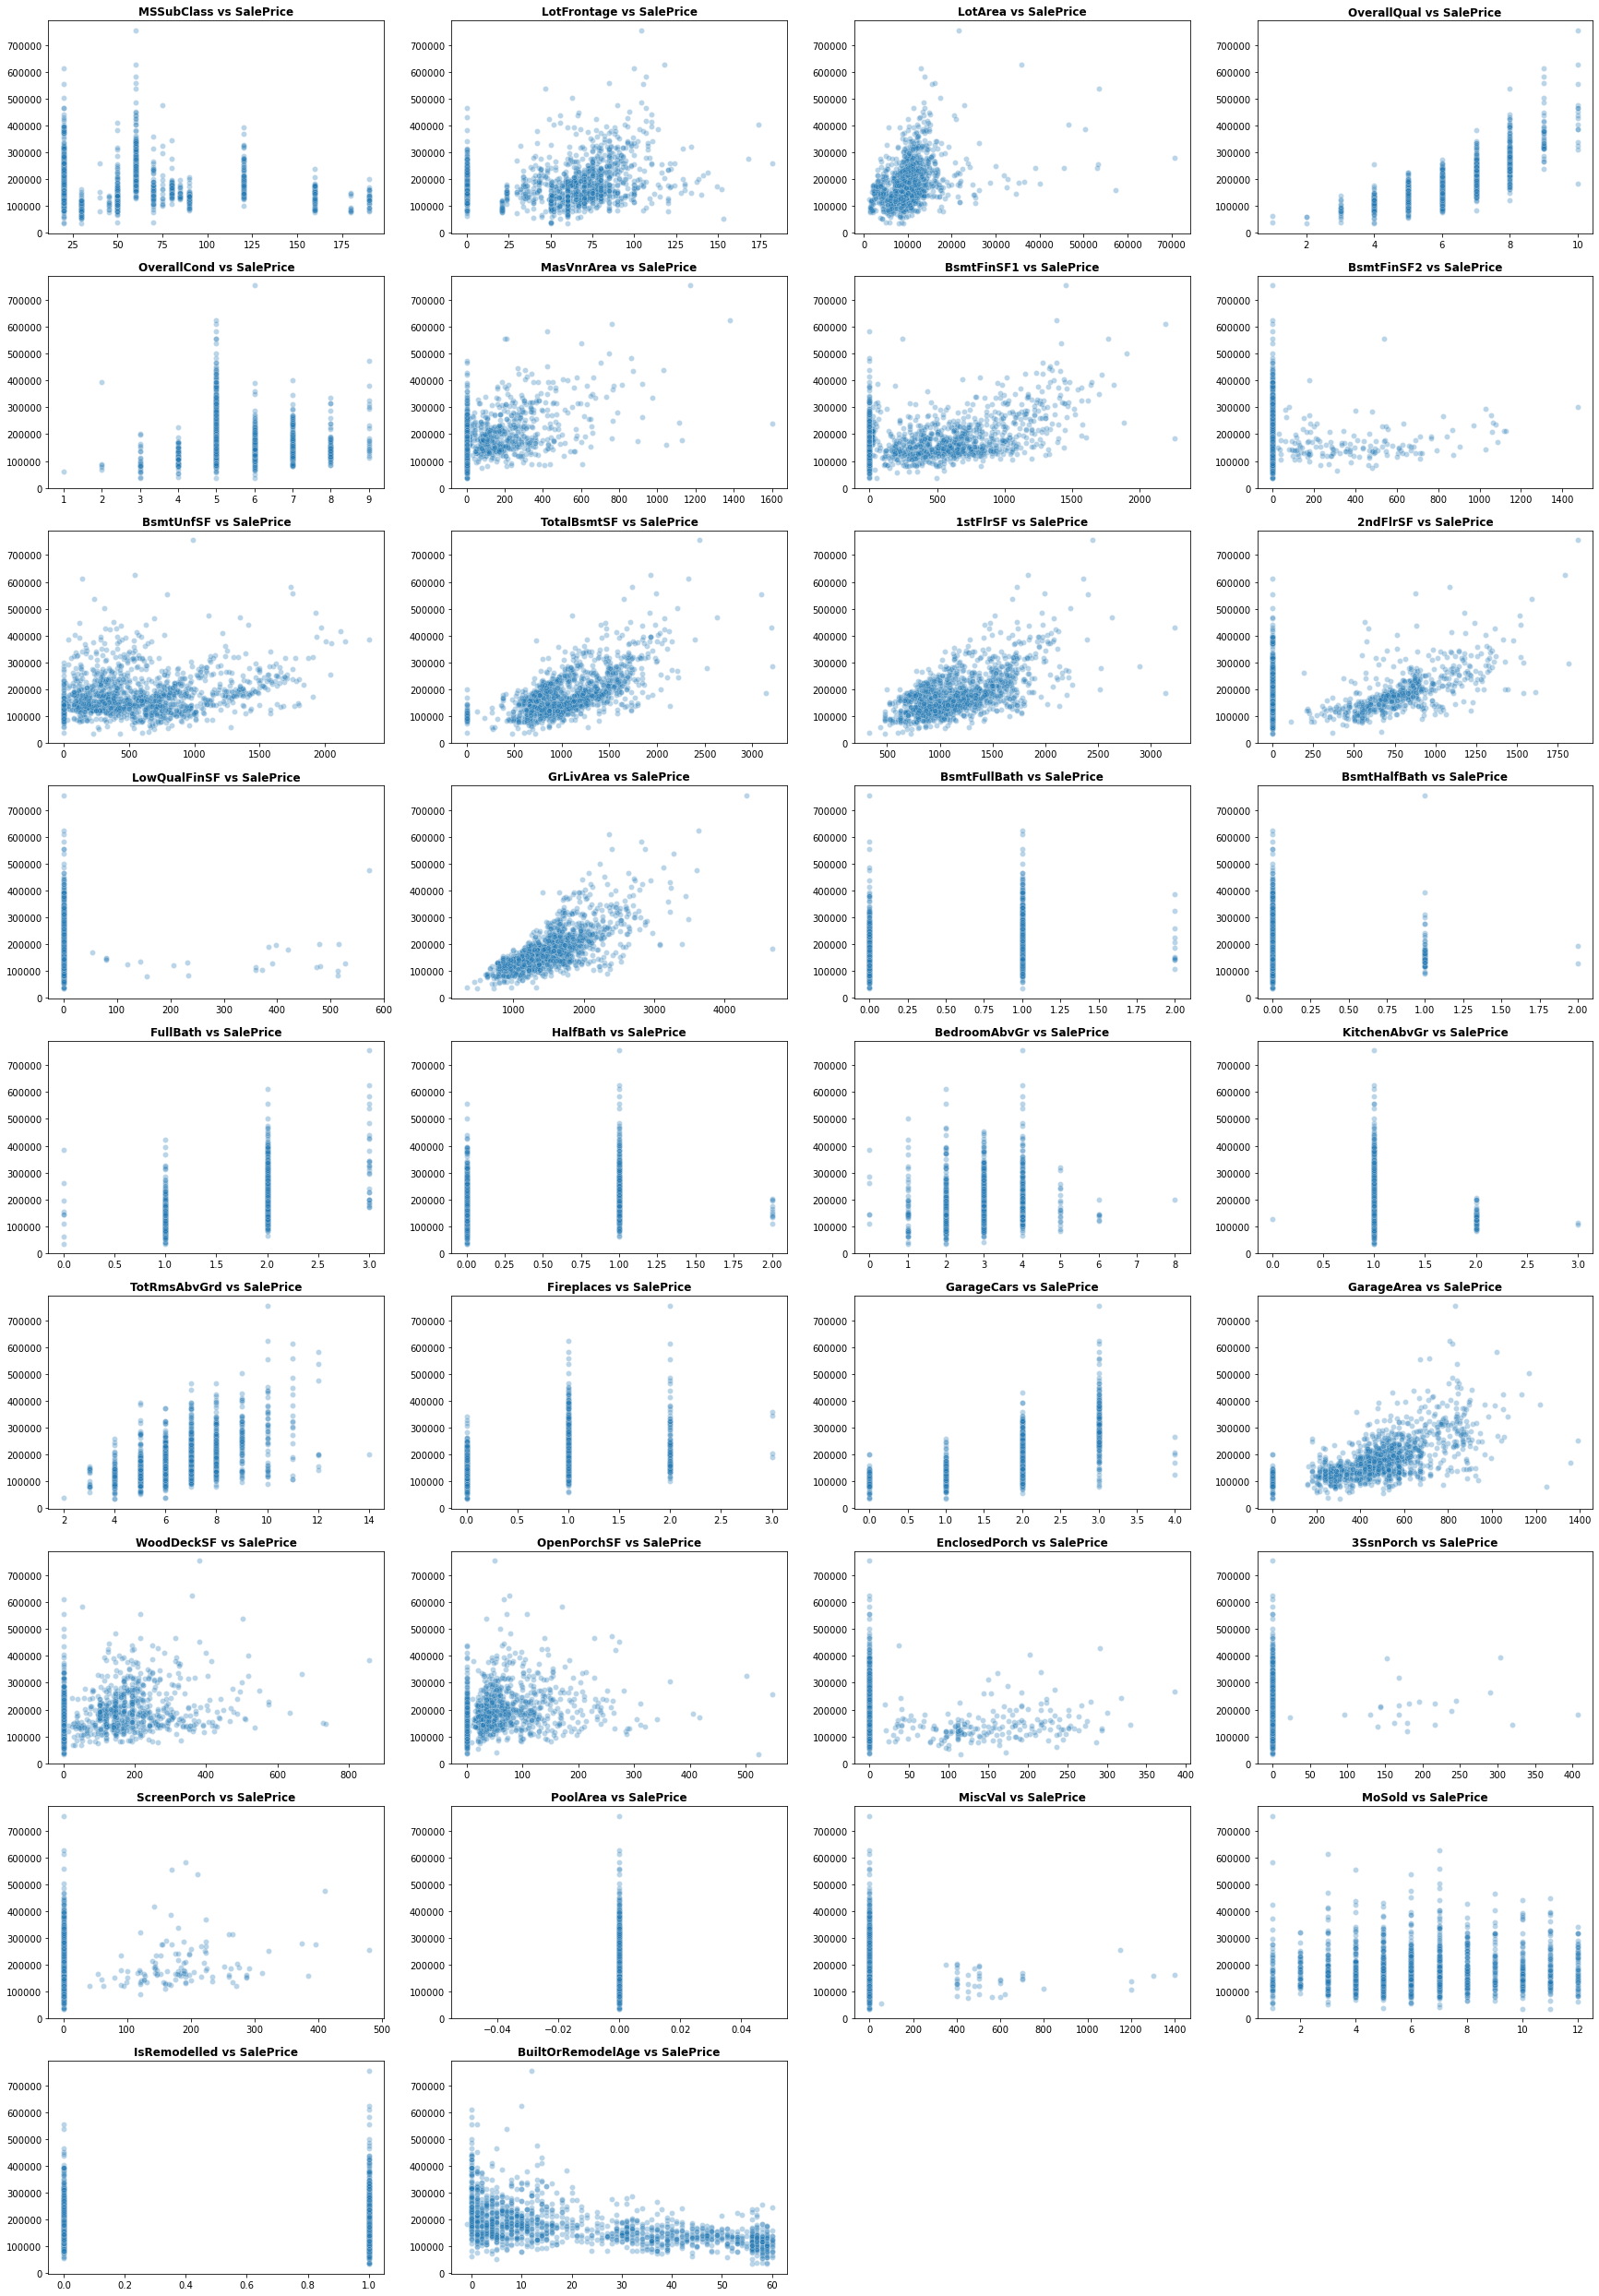

In [24]:
#Lets see the scatterplot for the numerical columns

plt.figure(figsize=(30, 50))

count = 1

for column in numerical_df.columns:
    if column != 'SalePrice':
        plt.subplot(10, 4, count)
        sns.scatterplot(data[column], data['SalePrice'], alpha = 0.3).set(ylabel=None, xlabel=None)
        plt.title(column + " vs " + 'SalePrice', weight='bold')
        count += 1
    
plt.show()

In [25]:
#Lets print all the categorical columns
categorical_columns = data.select_dtypes(include = np.object).columns.tolist()
for col in categorical_columns:
    print(col,' : ',data[col].head().unique())

MSZoning  :  ['RL']
Street  :  ['Pave']
Alley  :  ['None']
LotShape  :  ['Reg' 'IR1']
LandContour  :  ['Lvl']
Utilities  :  ['AllPub']
LotConfig  :  ['Inside' 'FR2' 'Corner']
LandSlope  :  ['Gtl']
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge']
Condition1  :  ['Norm' 'Feedr']
Condition2  :  ['Norm']
BldgType  :  ['1Fam']
HouseStyle  :  ['2Story' '1Story']
RoofStyle  :  ['Gable']
RoofMatl  :  ['CompShg']
Exterior1st  :  ['VinylSd' 'MetalSd' 'Wd Sdng']
Exterior2nd  :  ['VinylSd' 'MetalSd' 'Wd Shng']
MasVnrType  :  ['BrkFace' 'None']
ExterQual  :  ['Gd' 'TA']
ExterCond  :  ['TA']
Foundation  :  ['PConc' 'CBlock' 'BrkTil']
BsmtQual  :  ['Gd' 'TA']
BsmtCond  :  ['TA' 'Gd']
BsmtExposure  :  ['No' 'Gd' 'Mn' 'Av']
BsmtFinType1  :  ['GLQ' 'ALQ']
BsmtFinType2  :  ['Unf']
Heating  :  ['GasA']
HeatingQC  :  ['Ex' 'Gd']
CentralAir  :  ['Y']
Electrical  :  ['SBrkr']
KitchenQual  :  ['Gd' 'TA']
Functional  :  ['Typ']
FireplaceQu  :  ['None' 'TA' 'Gd']
GarageType  :  ['Attchd' 'Detchd']
Gar

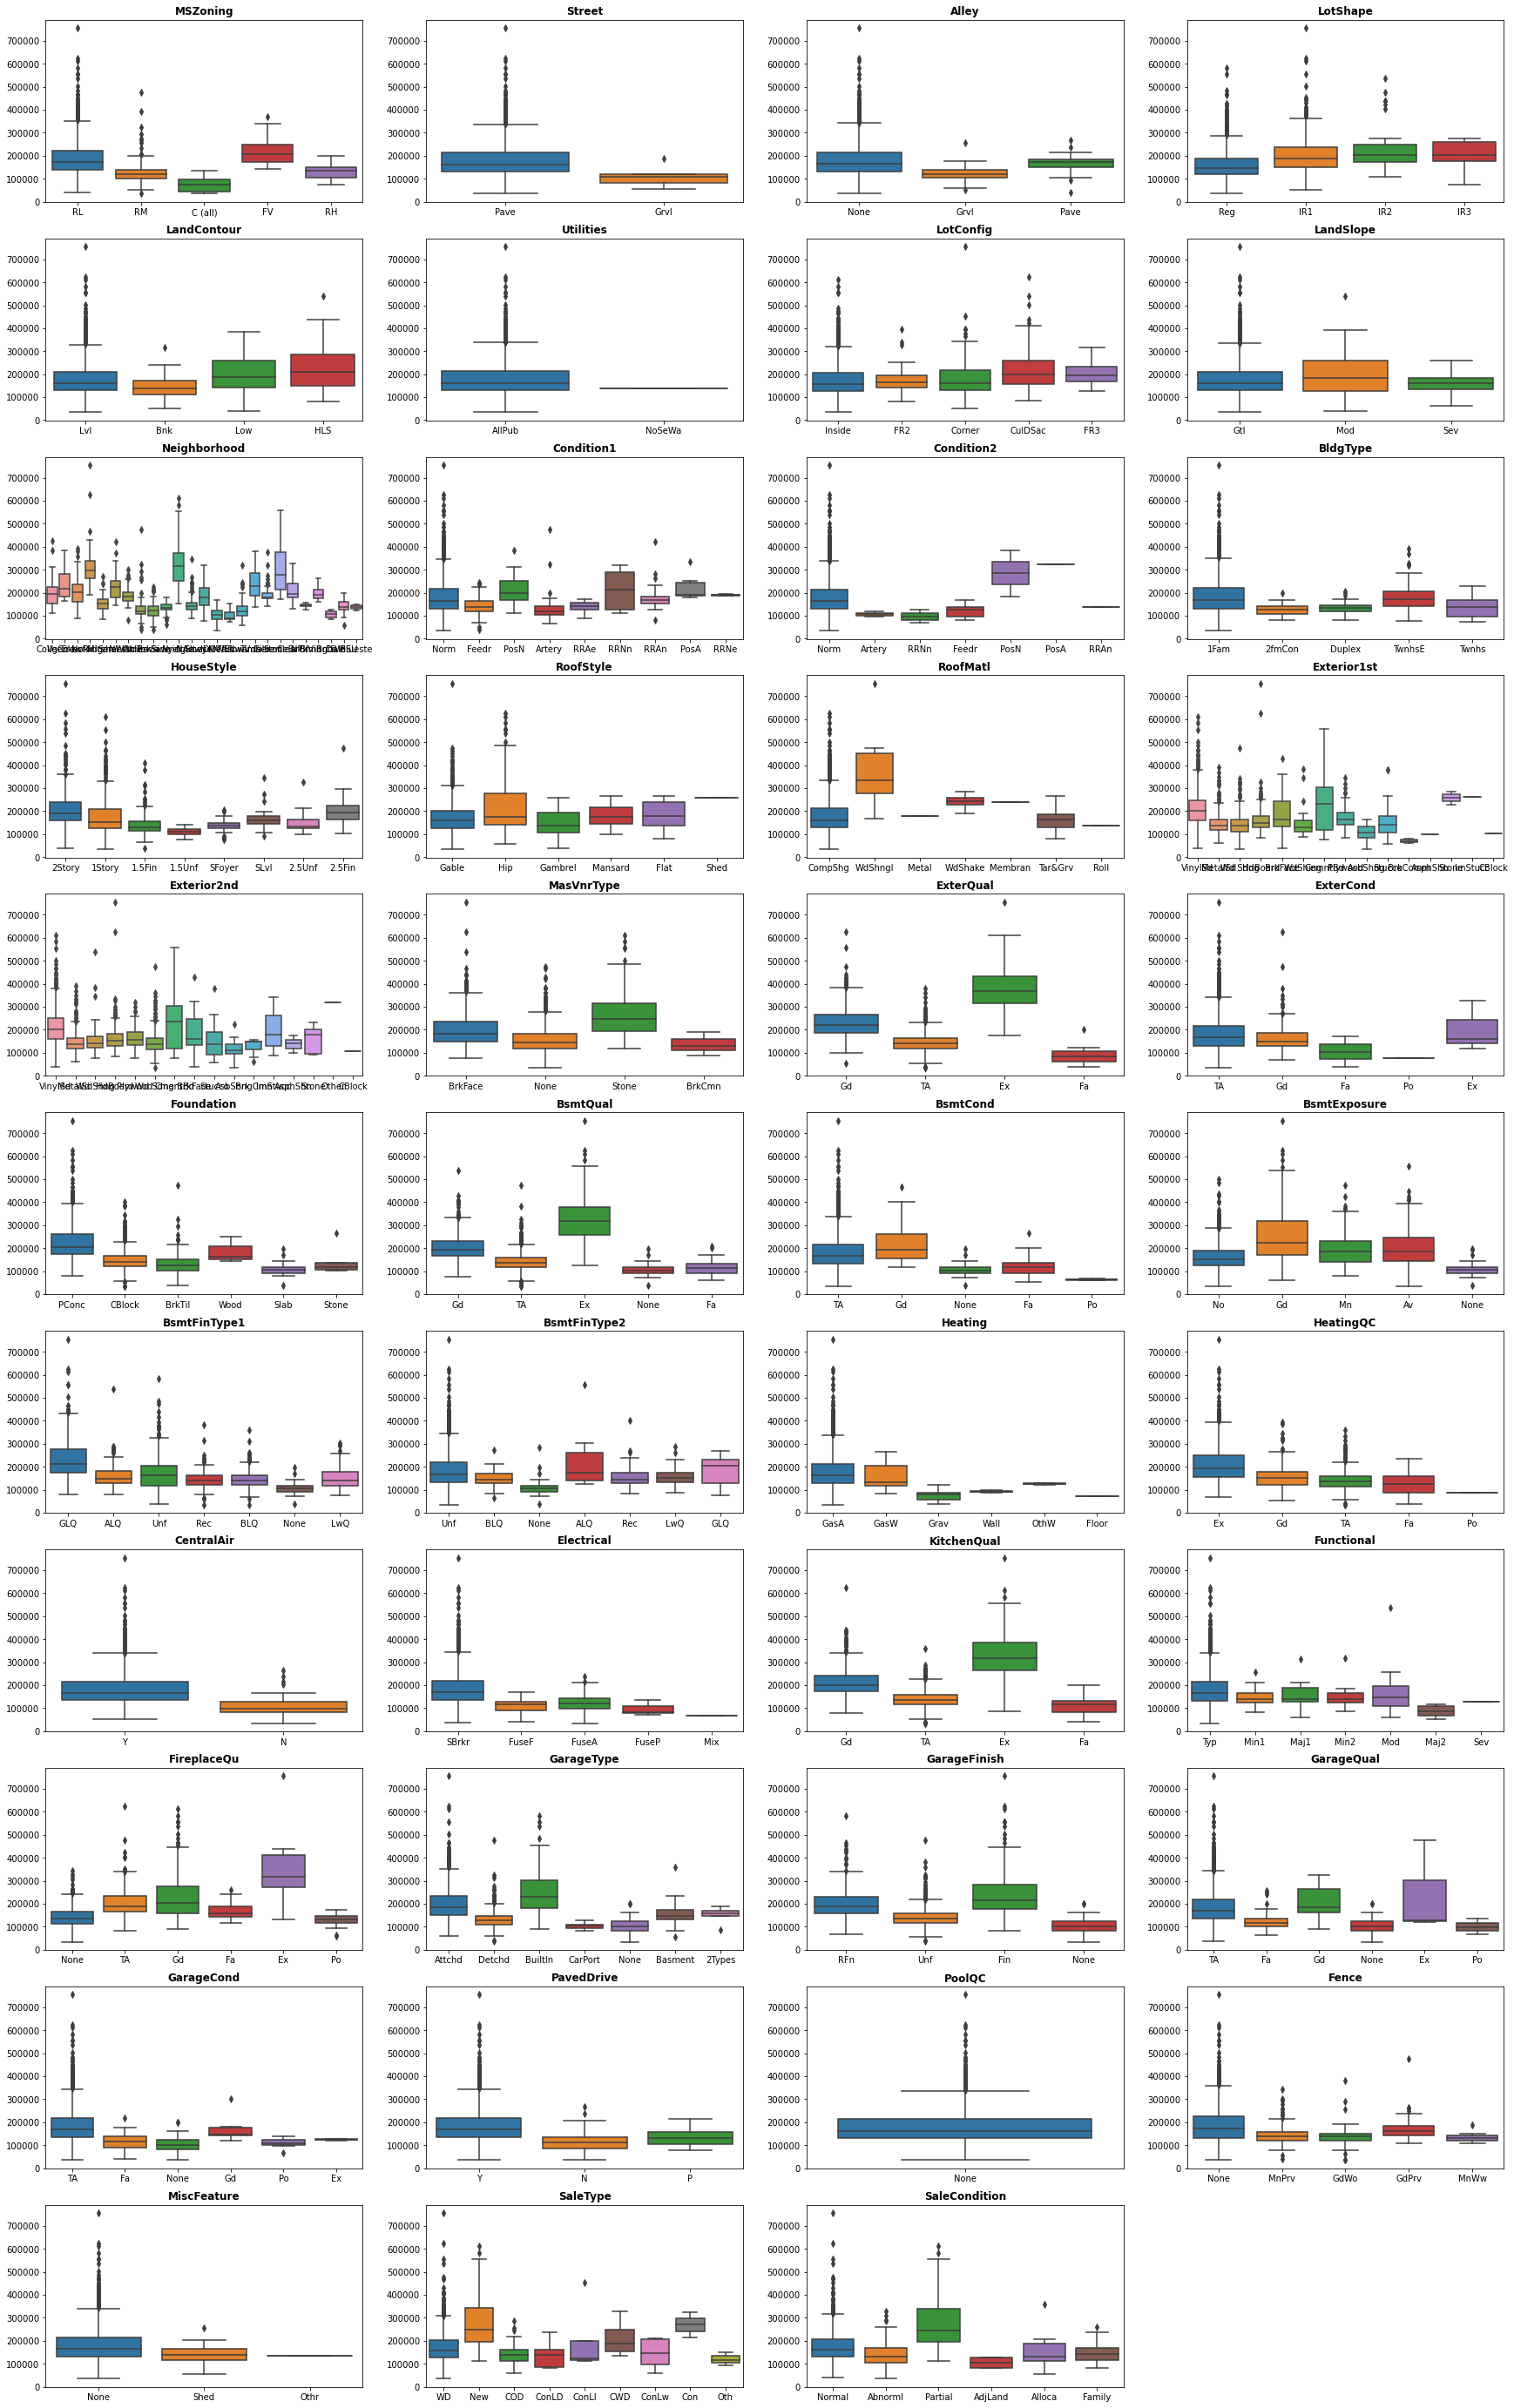

In [26]:
#lets define method to plot the categorical variable in graph
plt.figure(figsize=(30, 50))
count = 1
for column in categorical_columns:
    if column != 'SalePrice':
        plt.subplot(11, 4, count)
        sns.boxplot(x=data[column], y=data['SalePrice']).set(ylabel=None, xlabel=None)
        plt.title(column, weight='bold')
        count += 1
#Ploting the graph for all categorical variables   
plt.show()


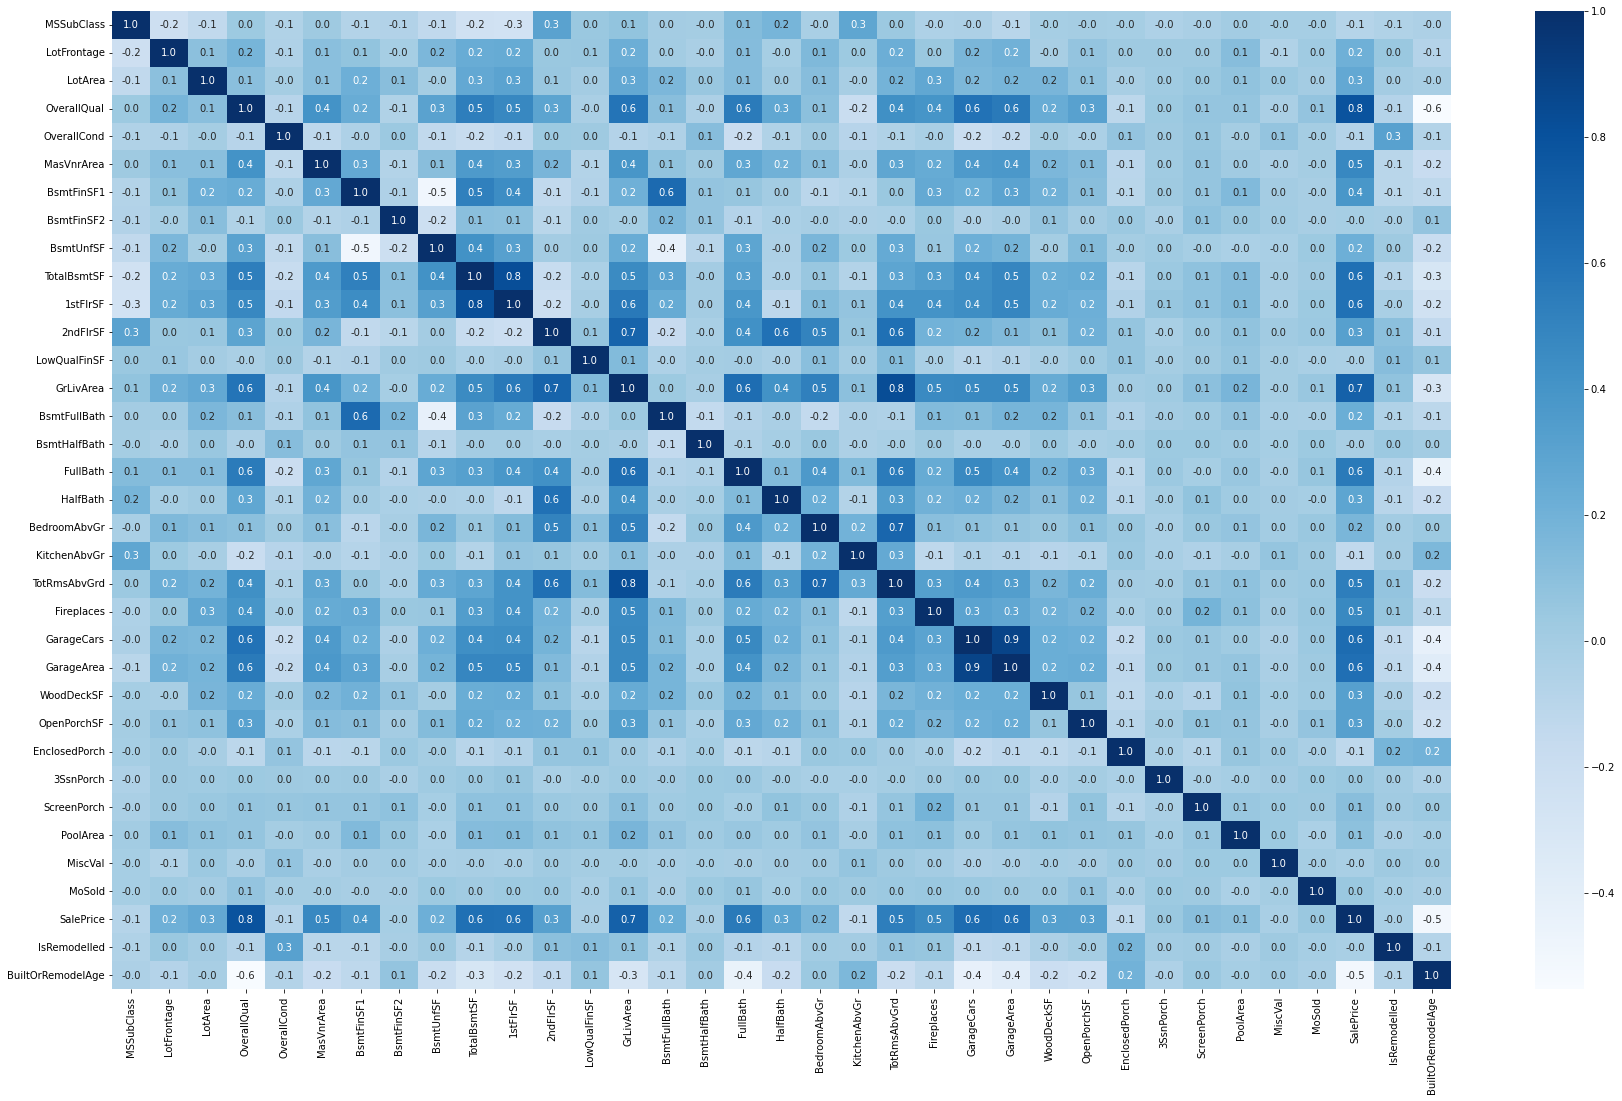

In [27]:
#Lets plot the heatmap to see the correlations for the features in the dataset
plt.figure(figsize=(30,18))
sns.heatmap(numerical_df.corr(), annot = True,cmap="Blues",fmt='.1f')
plt.show()

### 4. Data Preparation for modelling

In [28]:
#Lets load the ordinal values into a separate list
ordinal_cols = ['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']
data[ordinal_cols].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [29]:
#The ordinality for the features are encoded as following

data['E_LotShape'] = data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
data['E_ExterQual'] = data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
data['E_BsmtQual'] = data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['E_BsmtExposure'] = data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
data['E_BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
data['E_HeatingQC'] = data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['E_KitchenQual'] = data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['E_FireplaceQu'] = data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['E_GarageFinish'] = data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
data['E_BldgType'] = data['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
data['E_HouseStyle'] = data['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
data['E_Fence'] = data['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
data['E_LotConfig'] = data['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
data['E_MasVnrType'] = data['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
data['E_SaleCondition'] = data['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
data['E_Alley'] = data['Alley'].map({'None': 0,'Grvl':1,'Pave':2})
data['E_Utilities'] = data['Utilities'].map({'AllPub': 1, 'NoSeWa': 0 })
data['E_LandSlope'] = data['LandSlope'].map({'Gtl':2, 'Mod':1,'Sev':0})
data['E_ExterCond'] = data['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['E_BsmtCond'] = data['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['E_BsmtFinType2'] = data['BsmtFinType2'].map({'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ': 1,'Unf': 0, 'None': 0 })
data['E_CentralAir'] = data['CentralAir'].map({'N': 0,'Y':1})

data['E_GarageQual'] = data['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
data['E_GarageCond'] = data['GarageCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

data['E_PoolQC'] = data['PoolQC'].map({'None': 0})
data['E_MiscFeature'] = data['MiscFeature'].map({'None': 0,'Othr':1,'Shed':2})

data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,E_Utilities,E_LandSlope,E_ExterCond,E_BsmtCond,E_BsmtFinType2,E_CentralAir,E_GarageQual,E_GarageCond,E_PoolQC,E_MiscFeature
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,1,2,3,3,0,1,3,3,0,0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,1,2,3,3,0,1,3,3,0,0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,1,2,3,3,0,1,3,3,0,0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,1,2,3,4,0,1,3,3,0,0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,1,2,3,3,0,1,3,3,0,0


In [30]:
# dropping the old columns from which the new columns were derived

data=data.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition','Street',], axis=1)
data= data.drop(['Alley','Utilities','LandSlope','ExterCond','BsmtFinType2','CentralAir',
                 'GarageQual','GarageCond','PoolQC','MiscFeature','BsmtCond'],axis='columns')

In [31]:
#Lets create dummy variables for categorical values
dummy_col = pd.get_dummies(data[['MSZoning','LandContour','Neighborhood','Condition1','Condition2',
                                 'RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','Foundation',
                                 'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType']],drop_first=True)

#add the dummies to the dataset
data = pd.concat([data,dummy_col],axis='columns')

#lets drop the original features as have dummy feature set
data= data.drop(['MSZoning','LandContour','Neighborhood','Condition1','Condition2',
                'RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','Foundation',
                'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType'],axis='columns')


In [32]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,1,0,0,0,0,0,0,0,1
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,1,0,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,1,0,0,0,0,0,0,0,1
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,1,0,0,0,0,0,0,0,1
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,1,0,0,0,0,0,0,0,1


In [33]:
# As the sale price is too big lets bring down them by scaling down to logarithmic value
data['SalePrice_Log'] = np.log(data['SalePrice'])
data= data.drop(['SalePrice'],axis='columns')

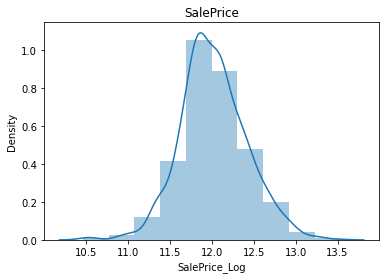

In [34]:
#Lets see the distribution of the saleprice before starting scaling
plt.title('SalePrice')
sns.distplot(data['SalePrice_Log'], bins=10)
plt.show()

### Step 5: Train-Test split:

In [35]:
#Splitting the train test sets
df_train,df_test = train_test_split(data,train_size=0.7,test_size=0.3,random_state=100)

In [36]:
#lets use standard scaler for our model and lets transform them on numerical columns
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()

#instantiate object of standardscaler
scaler = StandardScaler()
#we fit transform on the training set
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])

#NOTE: We use only transform without fit on the test data
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])

In [37]:
#Lets split the X,y variables on train set
y_train = df_train.pop('SalePrice_Log')
X_train = df_train

In [38]:
#Lets split the X,y variables on test set
y_test = df_test.pop('SalePrice_Log')
X_test = df_test

### Step 6: Building the model:

#### Lasso Regression
#Lets build the model with Lasso Regression first


In [39]:
lm = Lasso(alpha=0.01)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)

y_test_pred  = lm.predict(X_test)

In [40]:
print("Train Score:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Test Score:",r2_score(y_true=y_test,y_pred=y_test_pred) )

Train Score: 0.9301660708341232
Test Score: 0.9045878725829546


In [41]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
lasso_coef = pd.DataFrame(list(zip(col,model_parameter)))
lasso_coef.columns = ['Featuere','Coef']

#### We can see that Lasso takes the hyperparameter as zero for certain features if they dont contribute to our model

In [42]:
# Lets see if we can find the better outputs with better alpha value using gridsearch
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [43]:
# Lets see the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
10,0.01,-0.182480,-0.211995,1
9,0.005,-0.173819,-0.212750,2
8,0.004,-0.172168,-0.213601,3
7,0.003,-0.170066,-0.215721,4
6,0.002,-0.166786,-0.217946,5
5,0.001,-0.163662,-0.221605,6
4,0.0005,-0.162469,-0.224523,7
3,0.0004,-0.162242,-0.225238,8
2,0.0003,-0.162011,-0.226084,9
1,0.0002,-0.161775,-0.227084,10


In [44]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.01)

#### As we found the optimum alpha, lets fit our model with this value

In [45]:
lm = Lasso(alpha=0.01)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
y_test_pred  = lm.predict(X_test)

print("Train Score:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Test Score:",r2_score(y_true=y_test,y_pred=y_test_pred) )

Train Score: 0.9301660708341232
Test Score: 0.9045878725829546


In [46]:
#mean squared error for lasso

mean_squared_error(y_test, lm.predict(X_test))

0.10250800966935933

In [47]:
#As we arrived at pretty decent scores, we conclude our model build here
#Lets plot the graph of the lasso actual and lasso predicted values

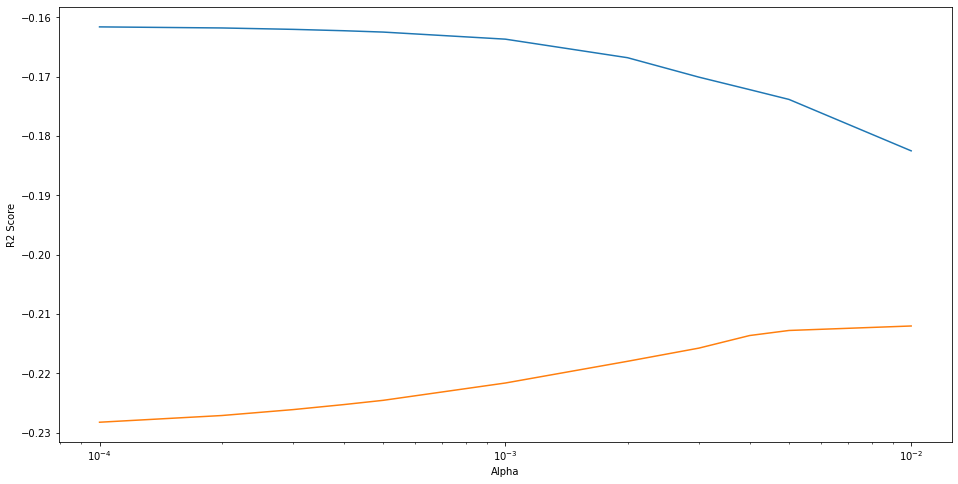

In [48]:
# Plot showing comparision of test and train score
plt.figure(figsize=(10,6))
plt.plot(lasso_cv_results['param_alpha'],lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'],lasso_cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('Negative mean absolute error')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [49]:
# Significant variables which predict price of house when used lasso
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
14,BsmtFullBath,0.285
4,OverallCond,0.208
10,1stFlrSF,0.084
5,MasVnrArea,0.066
25,WoodDeckSF,0.066
7,BsmtFinSF2,0.052
3,OverallQual,0.049
84,Neighborhood_OldTown,0.046
89,Neighborhood_StoneBr,0.046
148,Foundation_Slab,0.046


### Ridge:

In [50]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:

model_cv_results = pd.DataFrame(model_cv.cv_results_)
model_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
25,100,-0.170513,-0.218029,1
24,50,-0.167093,-0.221230,2
26,500,-0.191965,-0.222657,3
23,20,-0.164556,-0.225282,4
22,10.0,-0.163406,-0.227252,5
21,9.0,-0.163274,-0.227488,6
20,8.0,-0.163130,-0.227730,7
19,7.0,-0.162976,-0.227966,8
18,6.0,-0.162809,-0.228200,9
17,5.0,-0.162643,-0.228426,10


In [52]:
#Lets do it with Ridge Regression
ridge = Ridge(alpha=100)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print("Train Score", r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print("Test Score", r2_score(y_test,y_test_pred))

Train Score 0.9384055987302959
Test Score 0.8955182282347336


In [53]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.11225217129444634

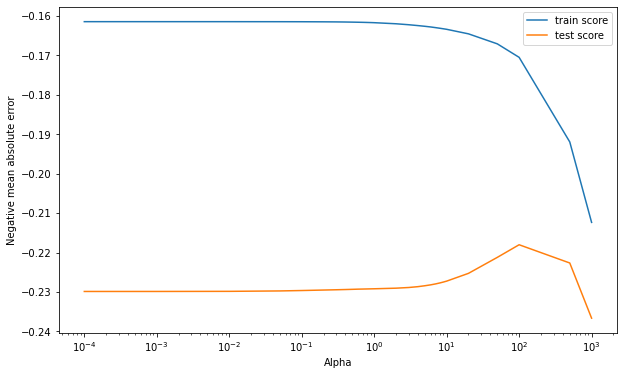

In [69]:
# Plot showing comparision of test and train score
plt.figure(figsize=(10,6))
plt.plot(model_cv_results['param_alpha'],model_cv_results['mean_train_score'])
plt.plot(model_cv_results['param_alpha'],model_cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('Negative mean absolute error')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [54]:
# Its good model, lets see if we can better the model with reduced features using RFE.

#### Lets use RFE followed by ridge
#### RFE helps in identifying the significant features before we can use them in our ridge model [ Because ridge models can't eliminate features like Lasso]

RFE with 60 columns

In [55]:
# Running RFE with the output number of the variable equal to 60
lm  = LinearRegression()
lm.fit(X_train,y_train)

# running RFE
rfe = RFE(lm, 60)            
rfe = rfe.fit(X_train, y_train)

In [56]:
#Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 60 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,BsmtFinSF1,True,1
5,BsmtFinSF2,True,1
6,BsmtUnfSF,True,1
7,TotalBsmtSF,True,1
8,1stFlrSF,True,1
9,2ndFlrSF,True,1


In [57]:
# Assign the 60 columns to X_train_rfe
X_train_rfe = X_train[col]

In [58]:
# Associate the new 60 columns to X_train and X_test for further analysis
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [59]:
ridge = Ridge(alpha=100)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print("Train Score_60 features", r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print("Test Score_60 features", r2_score(y_test,y_test_pred))


Train Score_60 features 0.9263303212023932
Test Score_60 features 0.8949926025678046


#### Let's do RFE with 50 Features, model the data on Ridge and check the results

In [61]:
# Running RFE with the output number of the variable equal to 50
lm  = LinearRegression()
lm.fit(X_train,y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [62]:
#Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,BsmtFinSF1,True,1
5,BsmtFinSF2,True,1
6,BsmtUnfSF,True,1
7,TotalBsmtSF,True,1
8,1stFlrSF,True,1
9,2ndFlrSF,True,1


In [63]:
# Assign the 50 columns to X_train_rfe
X_train_rfe = X_train[col]

In [64]:
# Associate the new 50 columns to X_train and X_test for further analysis
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

ridge = Ridge(alpha=100)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print("Train Score_50 features", r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print("Test Score_50 features", r2_score(y_test,y_test_pred))

Train Score_50 features 0.919552407275185
Test Score_50 features 0.8858369719787935


#### Lets model our Ridge regression and model them with 30 features:

In [65]:
# Running RFE with the output number of the variable equal to 30
lm  = LinearRegression()
lm.fit(X_train,y_train)

# running RFE
rfe = RFE(lm, 30)            
rfe = rfe.fit(X_train, y_train)

In [66]:
#Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 30 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,BsmtFinSF2,True,1
5,BsmtUnfSF,True,1
6,TotalBsmtSF,True,1
7,1stFlrSF,True,1
8,2ndFlrSF,True,1
9,LowQualFinSF,True,1


In [67]:
# Assign the 30 columns to X_train_rfe
X_train_rfe = X_train[col]

In [68]:
# Associate the new 30 columns to X_train and X_test for further analysis
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

ridge = Ridge(alpha=100)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print("Train Score_30 features", r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print("Test Score_30 features", r2_score(y_test,y_test_pred))

Train Score_30 features 0.9043772945660574
Test Score_30 features 0.8834845931739161


Still we arrived at pretty decent score with cutting down many features which is great, because its easier for the management to build a simpler model which will be helpful for the management to understand the pricing dynamics of the market

### Step 7: Observation


In [71]:
# Sorting the coefficients in ascending order
# Method to get the coefficient values
lm  = LinearRegression()
lm.fit(X_train,y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]

X_train_rfe = X_train[col]

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

ridge = Ridge(alpha=100)
ridge.fit(X_train,y_train)


Ridge(alpha=100)

In [76]:
y_train_pred = ridge.predict(X_train)
print("Train Score_15 features", r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print("Test Score_15 features", r2_score(y_test,y_test_pred))

Train Score_15 features 0.8899166421403775
Test Score_15 features 0.881546279350492


In [79]:
# Significant variables which predict price of house when used ridge
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

temp=ridge_coef.sort_values(by = 'Coef',ascending = False).head(10)
temp

,Feature,Coef
1,LotFrontage,0.261832
6,BsmtFinSF1,0.239344
5,MasVnrArea,0.183623
7,BsmtFinSF2,0.157749
4,OverallCond,0.147223
3,OverallQual,0.107829
9,TotalBsmtSF,0.105723
12,LowQualFinSF,0.105670
15,BsmtHalfBath,0.100664
2,LotArea,0.087665


### Which variables are significant in predicting the price of a house?

- LotFrontage: Linear feet of street connected to property
- BsmtFinSF1: Basement finished square feet
- BsmtFullBath: Basement full bathrooms
- OverallCond: Overall condition of the house
- OverallQual: Rates the overall material and finish of the house
- TotalBsmtSF: Total basement square feet
- BsmtFinSF2: Type 2 finished square feet
- 1stFlrSF:First Floor square feet
- LotArea: Lot size in square feet

### How well those variables describe the price of a house?

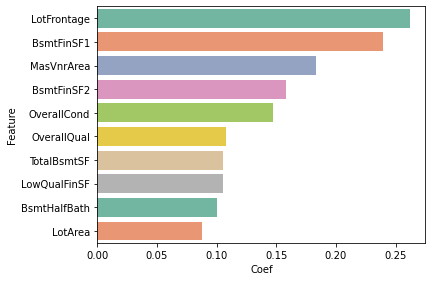

In [86]:
# bar plot to determine the variables that would affect pricing most using ridge regression
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Feature', x='Coef', palette='Set2', data = temp)
plt.show()

### Step 8: Conclusion

The optimal lambda value in case of Ridge and Lasso is as below:

- Ridge - 100	
- Lasso - 0.01	

The Mean Squared error in case of Ridge and Lasso are:
- Ridge - 0.1122
- Lasso - 0.1025

##### Best Train and Test Scores in our models:
Lasso Model: α=0.01
- Train R2 Score: 93
- Test R2 Score: 90

##### Optimum Train and Test scores with minimum number of features(15) [For ease in business point of view]:
Ridge Model + RFE with 15 features
- Train R2 Score:88.99
- Test R2 Score:88.15